# План семинара
- Функционалы и метрики
- Кросс-валидация
- Переобучение и регуляризация
- Гиперпараметры и их оптимизация

# Функционалы и метрики

Quick recap

Функционал (или функция потерь == loss function)  - это функция, позволяющая обучить модель (то есть то, что мы стараемся оптимизировать, подбирая параметры модели - в случае линейной регрессии параметры - это веса)

Метрика - это оценка качества модели, которую можно использовать к любым моделям (позволяет ответить на вопрос, насколько точно модель может предсказывать целевую переменную)

Пример: Чтобы обучить линейную регрессию мы можем минизировать функционал MSE

Если мы имеем n наблюдений и k признаков

$\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2} \rightarrow min_{w}$

где $\hat y_{i} = \Sigma_{i=0}^{k}w_{k}X_{ik}$

А как метрику можем использовать RMSE

$RMSE = \sqrt{\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2}}$

Фундаментальное различие функционала и метрик в том, что метрика должна отражать нашу бизнес-задачу или научный вопрос, а функционал должен быть подобран так, чтобы он лучше лучше всего помогал достичь цель (позволял достичь наилучшных показателей метрики или метрик)

Аналогия из обучения в вышке: Чтобы сдать матан, мы можем учить производные различных функций, то есть тогда наш функционал - это количество производных, которые мы знаем. А метрикой того, что мы сдали матан будет являться оценка, полученная в конце курса.

Оценка в курсе - это понятная метрика, которую нам дал мир. А является ли зубрежка производных лучшим функционалом для достижения поставленной цели решать уже вам, как исследователям

И еще, хотя функционал и метрики - это разные по смыслу и использованию инстурменты, они могут быть считаться одинаково (то есть к примеру обучать линейную регрессию можно обучать с помощью функционала MSE, и проверять качество тоже можно с помощью MSE)

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes 

In [ ]:
np.random.seed(42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X, y = load_diabetes(return_X_y=True,as_frame=True)


In [ ]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Populating the interactive namespace from numpy and matplotlib


(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

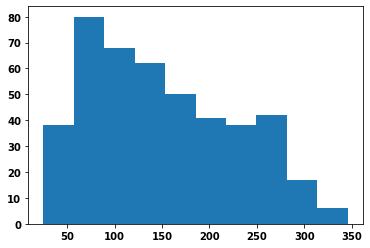

In [ ]:
from matplotlib import pylab as plt
%pylab inline

plt.hist(y)

Как было рассказано на лекции, линейную регрессию можно обучать с помощью разного функционала (не только MSE, который мы разбирали на прошлом семинаре) и оценивать с помощью разных метрик - закодим это 

(array([33., 62., 53., 45., 31., 31., 27., 29., 15.,  5.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

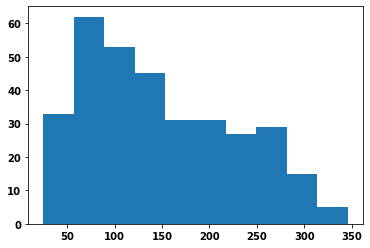

In [ ]:
plt.hist(y_train)

(array([12., 16., 14., 16., 17., 10., 10., 13.,  2.,  1.]),
 array([ 37. ,  67.4,  97.8, 128.2, 158.6, 189. , 219.4, 249.8, 280.2,
        310.6, 341. ]),
 <a list of 10 Patch objects>)

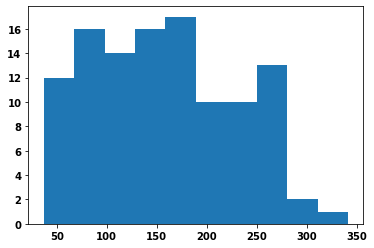

In [ ]:
plt.hist(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_mse = SGDRegressor(loss='squared_loss', max_iter=50000) # MSE
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000) # MAE

lr_mse.fit(X_train, y_train)
lr_mae.fit(X_train, y_train)

y_pred_mse = lr_mse.predict(X_test)
y_pred_mae = lr_mae.predict(X_test)

print(f'''MSE loss: 
mae={mean_absolute_error(y_test, y_pred_mse)}
mse={mean_squared_error(y_test, y_pred_mse)}
R2={r2_score(y_test, y_pred_mse)}
''')

print(f'''MAE loss: 
mae={mean_absolute_error(y_test, y_pred_mae)}
mse={mean_squared_error(y_test, y_pred_mae)}
R2={r2_score(y_test, y_pred_mae)}
''')





MSE loss: 
mae=41.80030893534715
mse=2486.190309920277
R2=0.5158769611953762

MAE loss: 
mae=64.55889354447324
mse=6254.362146684059
R2=-0.21787974000043064



Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [ ]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'MSE Loss: {max_error(y_test, y_pred_mse)}')
print(f'MAE Loss: {max_error(y_test, y_pred_mae)}')

MSE Loss: 110.51741467028845
MAE Loss: 215.65472732449228


BTW, в sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

#  Кросс-валидация

Когда выбран функционал и метрика, можно задаться вопросом: а насколько я могу доверять полученным результатам (значениям метрики), не являются ли они случайности или совпадением ? Кросс-валидация - это инструмент для ответа на этот вопрос.

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

здесь можно посмотреть какие параметры требуются для этой функции
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [ ]:
# проверим на кросс-валидации значения ошибок MSE, MAE, R2 
# для линейной регрессии, обученной с помощью функционала MSE

num_splits=5

cv_res = cross_validate(lr_mse,
                     X,
                     y,
                     scoring='neg_mean_squared_error', # метрика, которую нужно оценить
                     cv=num_splits # количество разбиений или класс-сплиттер
                    )

print(f"test mse errors are {cv_res['test_score']}")
print(f"mean test mse = {cv_res['test_score'].mean()}")

test mse errors are [-2956.23745213 -3034.8706691  -3164.69449866 -2902.89782557
 -3034.71267133]
mean test mse = -3018.6826233552993


In [ ]:
# sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
# Проведем кросс-валидацию сразу для нескольких метрик

cv_res2 = cross_validate(lr_mse,
                     X,
                     y,
                     scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'],
                     cv=num_splits
                    )
print(f"""test mse errors are {cv_res2['test_neg_mean_squared_error']} 
and  mean mse = {cv_res2['test_neg_mean_squared_error'].mean()}
""")

print(f"""test mae errors are {cv_res2['test_neg_mean_absolute_error']} 
and  mean mae = {cv_res2['test_neg_mean_absolute_error'].mean()}
""")


print(f"""test R2 are {cv_res2['test_r2']} 
and  mean R2 = {cv_res2['test_r2'].mean()}
""")


test mse errors are [-2981.14839205 -3058.98187675 -3160.60287851 -2899.08189237
 -3071.09535637] 
and  mean mse = -3034.182079211073

test mae errors are [-44.98148939 -45.07946739 -48.01823569 -42.71843458 -44.54410135] 
and  mean mae = -45.06834567991787

test R2 are [0.38826454 0.51784789 0.49499718 0.44740111 0.52538512] 
and  mean R2 = 0.47477916862164793



In [ ]:
# для тех, кто хочет хочет дополнительно подумать

# кросс-валидацию можно проводить на основе своей кастомной метрики, но для этого
# из нее нужно сделать объект scorer

from sklearn.metrics import make_scorer

max_error_scorer = make_scorer(max_error, greater_is_better=False)

cv_res3 = cross_validate(lr_mse,
                     X,
                     y,
                     scoring=max_error_scorer,
                     cv=num_splits
                    )
cv_res3['test_score']

array([-137.30460221, -160.94153745, -120.72109177, -130.69395345,
       -135.39903531])

# Немного feature engineering

Один из самых главных источников улучшения качества прогноза модели - это информативный набор признаков. Поэтому в попытке улучшить качество нашей модели обогатим наше признаковое пространство попарныи произведениями признаков

In [ ]:
import copy

cols = copy.deepcopy(X.columns)
print(cols)

for col1 in cols:
    for col2 in cols:
        col_name = col1 + '_x_' + col2
        if col_name not in X.columns:
            X[col_name] = X[col1]*X[col2]
X

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s6_x_age,s6_x_sex,s6_x_bmi,s6_x_bp,s6_x_s1,s6_x_s2,s6_x_s3,s6_x_s4,s6_x_s5,s6_x_s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,...,-0.000672,-0.000894,-0.001089,-0.000386,0.000780,0.000614,0.000766,0.000046,-0.000351,0.000311
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,...,0.000174,0.004116,0.004746,0.002428,0.000779,0.001767,-0.006861,0.003641,0.006300,0.008502
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,...,-0.002212,-0.001314,-0.001153,0.000147,0.001182,0.000887,0.000839,0.000067,-0.000074,0.000672
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,...,0.000834,0.000418,0.000109,0.000343,-0.000114,-0.000234,0.000337,-0.000321,-0.000212,0.000088
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,...,-0.000251,0.002082,0.001697,-0.001020,-0.000184,-0.000727,-0.000380,0.000121,0.001492,0.002175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,...,0.000301,0.000365,0.000142,0.000431,-0.000041,-0.000018,-0.000207,-0.000019,0.000225,0.000052
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,...,-0.000245,0.002255,-0.000708,-0.003009,0.002195,0.003522,-0.001276,0.001526,-0.000806,0.001979
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,...,0.000646,0.000785,-0.000246,0.000268,-0.000578,-0.000214,-0.000387,-0.000172,-0.000726,0.000240
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,...,0.001179,0.001158,-0.001013,-0.000032,-0.000423,-0.000396,0.000744,-0.000689,-0.001155,0.000672


# Переобучение и регуляризация

Переобучение - ситуация, когда модель хорошо выучила обучающую выборку, но при этом показывает гораздо более низкое качество точности на тестовых данных. Это можно интерпретровать как модель стала слишком специфичной и потеряла обобщающую способность

В случае линеной регрессии, одним из симптомов переобучения являются высокие значения весов. С этим борются регуляризацией.

Регуляризация Lasso или L1-регуляризация:

$Q_{lasso}(w) = Q(w) + \alpha \Sigma_{j=0}^{k}|w_{k}|$

Регуляризация Ridge или L2-регуляризация:

$Q_{ridge}(w) = Q(w) + \alpha \Sigma_{j=0}^{k}w_{k}^{2}$


Как было рассказано в лекции, несмотря на то, что оба вида регуляризации ведут к занижению значений весов, отличие регуляризации Lasso заключается в том, что она может привести часть весов к 0 (что эквивалетно безинформативности  соответствующего признака), в случае Ridge регрессии веса могут быть сколько угодно близки к 0, но никогда не равны.

Объяснение в лекции :)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
lr_mse.fit(X_train, y_train)

pred = lr_mse.predict(X_test)

mean_squared_error(y_test, pred)

3130.6572326667115

In [ ]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Lasso

for a in np.arange(0, 1.1, 0.25):
    if a == 0:
        a += 0.00000001
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_tr = lasso.predict(X_train)
    y_pred2 = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_tr))
    print('Test MSE:', mean_squared_error(y_test, y_pred2))
    print(lasso.coef_,'\n')

alpha=1e-08
Train MSE: 2271.725388860244
Test MSE: 3659.767956070298
[ 6.30606294e+00  8.89019676e+01  4.57317239e+02  3.58799966e+02
 -2.45147510e+02  5.87757647e+01 -3.57390873e+02 -1.19682646e+01
  6.55842850e+02  4.99962004e+01  1.38407644e+03  1.55783835e+03
  1.33187294e+03  1.93154917e+03 -4.51904406e+03 -7.72921364e+02
  4.73329841e+03  4.49943420e+03  8.44509567e+02  1.43457393e+02
 -1.46242861e+02 -5.63997486e+04  2.05411721e+03  1.36237021e+03
  8.86792699e+03 -9.01259472e+03 -1.04387563e+03 -8.46274666e+02
 -2.14111519e+03  1.18950847e+03 -4.72775384e+02  1.35266470e+02
  4.29860631e+02  2.52071260e+03 -1.44683628e+04  8.33654929e+03
  6.80340621e+03 -6.66824019e+00  5.19812306e+03 -4.98962117e+01
  3.11612688e+02 -5.02600794e+02  7.46999524e+02 -4.49806576e+02
  1.10027739e+04 -1.10443501e+04 -3.77348178e+03 -9.38337813e+02
 -6.70245001e+03 -2.02106363e+03 -2.58175389e+03  1.15842267e+04
 -1.21947531e+04  1.57891013e+04  7.20648249e+03 -8.60171791e+03
 -4.98424812e+03 -1.7

In [ ]:
# альфа - это гиперпараметр, посмотрим как зависят значения весов от него

from sklearn.linear_model import Ridge

for a in np.arange(0, 1.1, 0.25):
    if a == 0:
        a += 0.00000001
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)

    y_pred_tr = ridge.predict(X_train)
    y_pred2 = ridge.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_tr))
    print('Test MSE:', mean_squared_error(y_test, y_pred2))
    print(ridge.coef_,'\n')

alpha=1e-08
Train MSE: 2246.746674588863
Test MSE: 3673.3415006875694
[ 2.18556701e+01 -2.65942929e+02  4.72285362e+02  3.55555885e+02
 -1.85524475e+04  1.61966483e+04  6.45399044e+03 -7.51780354e+01
  6.71265814e+03  3.61372970e+01  1.41216741e+03  3.45588530e+02
  2.44348282e+02  1.12011841e+03 -1.72700300e+03 -1.89540613e+03
  1.85628475e+03  2.81873093e+03  6.74060288e+02  2.11323385e+02
  3.45588530e+02 -1.60589167e+00  1.01799406e+03  3.89138759e+02
  1.01943035e+04 -8.06642028e+03 -2.54090603e+03 -3.07718029e+02
 -3.12411417e+03  4.24288302e+02  2.44348282e+02  1.01799406e+03
  3.08076829e+02  1.63420645e+03 -9.15242765e+03  6.28752958e+03
  3.77998277e+03 -2.90156747e+02  3.86455988e+03  1.11004297e+02
  1.12011841e+03  3.89138759e+02  1.63420645e+03 -6.32027029e+02
  1.26171512e+04 -9.81613093e+03 -4.62792991e+03 -6.08622812e+02
 -4.80829536e+03 -1.45911069e+03 -1.72700299e+03  1.01943035e+04
 -9.15242765e+03  1.26171512e+04  1.08010154e+05 -7.46314899e+04
 -5.30149744e+04 -1.

А какой коэффициент альфа лучший ? И нужна ли здесь регуляризация ?

Чтобы ответить на этот вопрос мы можем с помощью кросс-валидации перебрать различные значения альфы и выбрать лучшее значение. Этот процесс называется оптимизацией гиперпараметров. Альфа является гиперпараметром, потому что задача оптимизации функционала не позволяет найти ее оптимальное значение (в отличие от весов регрессии).

In [ ]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(1e-10, 5, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X, y)

print(f'Optimal alpha value is {lasso_cv.alpha_}')


Optimal alpha value is 0.025125628240201005


In [ ]:
# Более общий способ использования кросс-валидации для поиска лучшего набора гиперпараметров


from sklearn.model_selection import GridSearchCV

params = {'alpha':alphas}

#print(params)
cv = GridSearchCV(lasso,
                  params,
                  scoring='r2',
                  cv=num_splits
                 )
cv.fit(X, y)

print(cv.best_params_)

{'alpha': 0.025125628240201005}


Больше про то, как задавать поле поиска и какие еще есть методы оптимизации гиперпараметров можете прочитать здесь

https://scikit-learn.org/stable/modules/grid_search.html